In [1]:
#import data and packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
data=gpd.read_file('final/noe_oebo_points.geojson')

In [3]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

In [4]:
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')
GKZ=geopandas.read_file('plotting_data/GKZ_bounds.gpkg')

In [5]:
xmin, ymin, xmax, ymax = data.geometry.total_bounds



(47.333795818274865, 49.10508297819204)

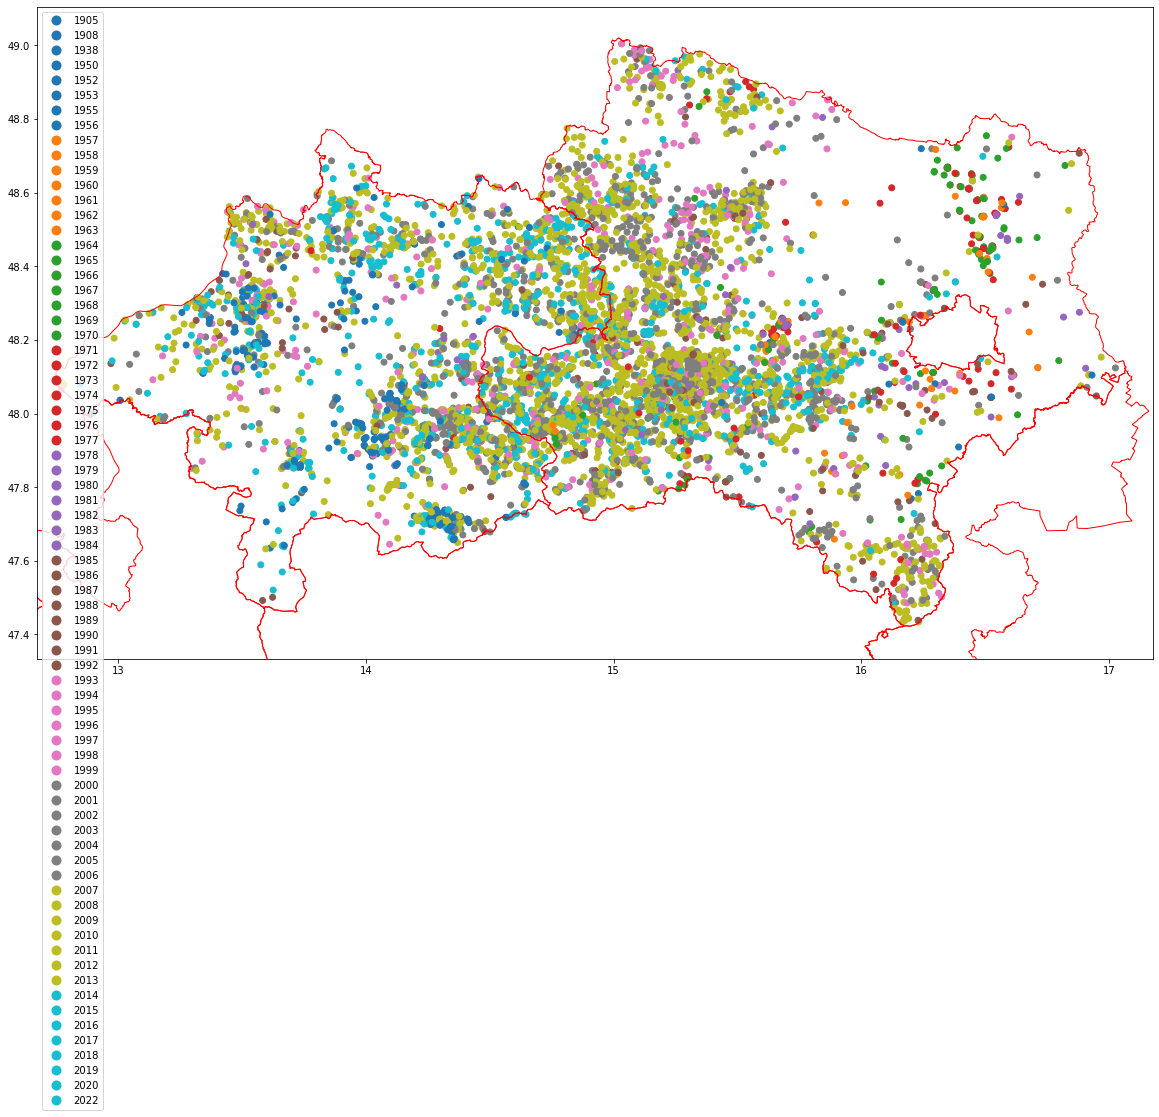

In [6]:
fig,ax=plt.subplots(1,figsize=(20,30))
data.plot(ax=ax,categorical=True,column='year',legend=True)
#basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
#basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

ax.set_xlim(xmin-0.1,xmax+0.15)
ax.set_ylim(ymin-0.1,ymax+0.1)



<AxesSubplot:>

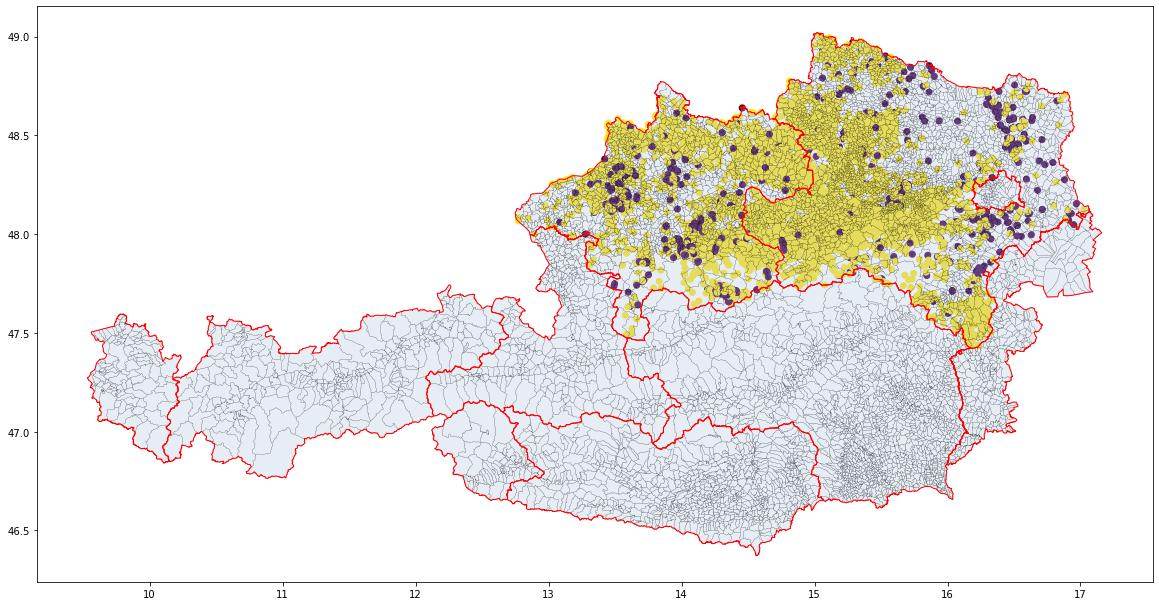

In [7]:
fig,ax=plt.subplots(1,figsize=(20,30))
data.plot(ax=ax,column='nitri')
basemap.plot(color='lightsteelblue',ax=ax, alpha=0.3)
#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

In [8]:
mi=data.year.unique().min()
ma=data.year.unique().max()


# plotting every 10 years. nitrification by color

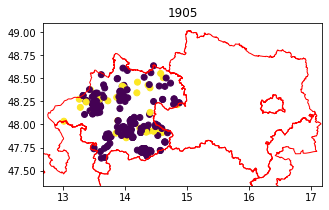

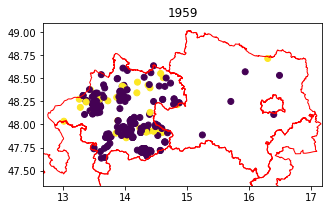

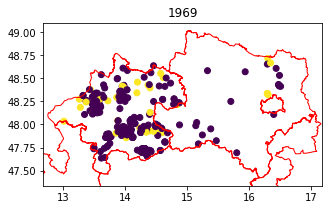

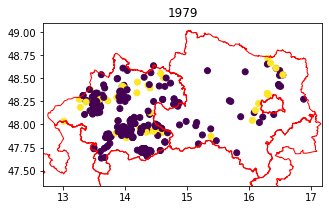

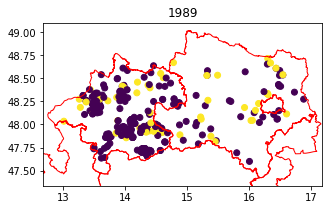

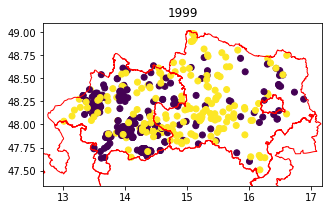

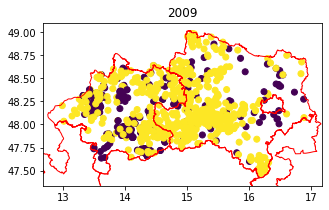

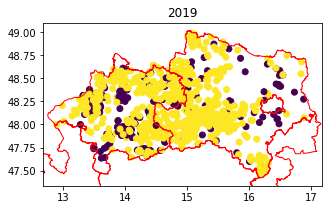

In [20]:
final=gpd.GeoDataFrame()
for i in sorted(list(data.year.unique()))[::10]:
    fig,ax=plt.subplots(1,figsize=(5,15))
    mergetemp=data[data.year==i]
    final=gpd.GeoDataFrame(pd.concat([final,mergetemp], ignore_index=True), crs=final.crs)
    final.plot(column='nitri',ax=ax, legend=False,legend_kwds={'shrink': 0.10})    
    #plot KG boundaries
    #basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
    BLs.geometry.boundary.plot(edgecolor='r', linewidth=1,ax=ax)
    ax.set_xlim(xmin-0.1,xmax+0.15)
    ax.set_ylim(ymin-0.1,ymax+0.1)
    ax.set_title(i)


# plotting all years by color. nitrification by symbol

<AxesSubplot:>

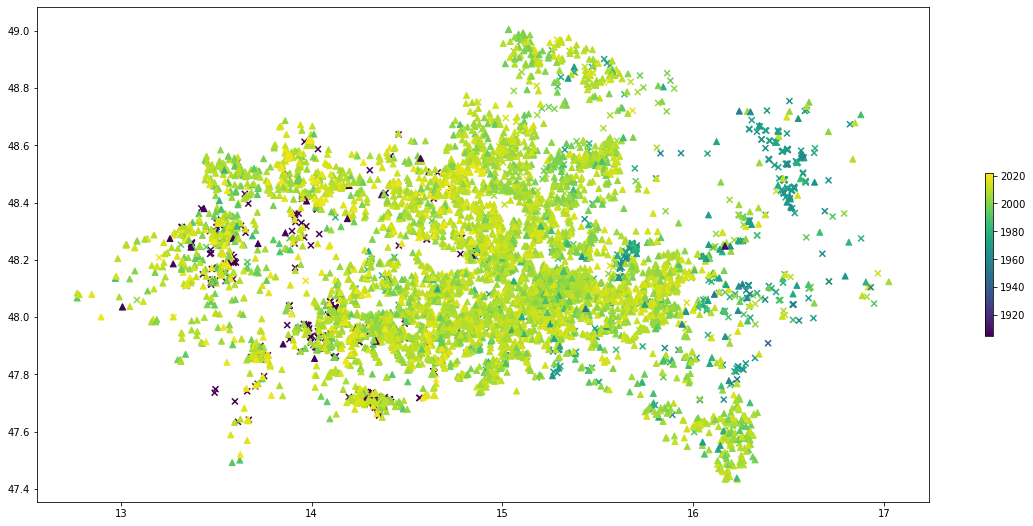

In [18]:
fig,ax=plt.subplots(1,figsize=(20,30))
data[data.nitri==False].plot(ax=ax,column='year', marker='x')
data[data.nitri==True].plot(ax=ax,column='year', marker='^', legend=True,legend_kwds={'shrink': 0.10})



# plot development of medium non nitrifying

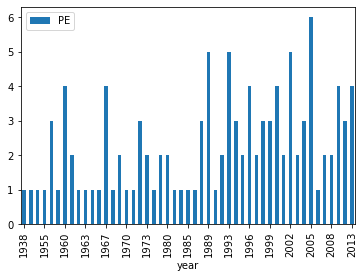

In [54]:
medium=data[data.PE>50]
to_plot=medium.groupby(['year','nitri']).count().reset_index()
to_plot[to_plot.nitri==0].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)


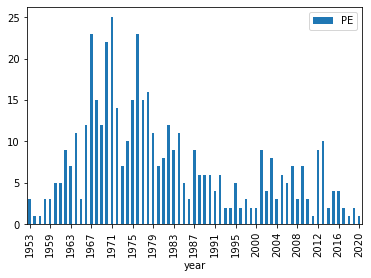

In [53]:
small=data[(data.PE<50)&(data.year>1905)]
to_plot=small.groupby(['year','nitri']).count().reset_index()
to_plot[to_plot.nitri==0].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)


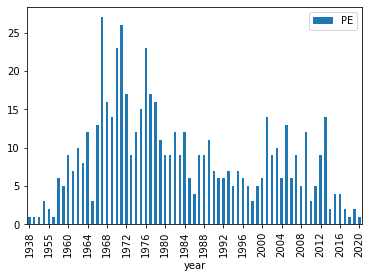

In [57]:
data=data[(data.year>1905)]
to_plot=data.groupby(['year','nitri']).count().reset_index()
to_plot[to_plot.nitri==0].plot.bar(x='year',y='PE')
plt.locator_params(axis="x", nbins=20)
